<a href="https://colab.research.google.com/github/asif1699/Deep-Learning-/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 1.8 MB/s 
     |████████████████████████████████| 449 kB 50.7 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.8 MB 34.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=383457008288f538b27aa16342476d30abface54eb368e5a15df8619f879b3c1
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [5]:
from google.colab import drive
drive .mount(('/content/drive'))

Mounted at /content/drive


In [6]:
import os 
os.chdir("/content/drive/MyDrive/my projects/ANN classification(heart dieases)")

In [7]:
data = pd.read_csv("/content/drive/MyDrive/my projects/ANN classification(heart dieases)/heart_failure_clinical_records_dataset.csv", sep=",")

In [8]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


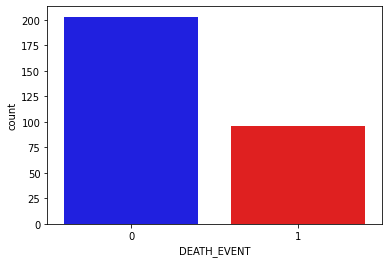

In [10]:
cols = ['b', 'r']
sns.countplot(x = data["DEATH_EVENT"], palette=cols)

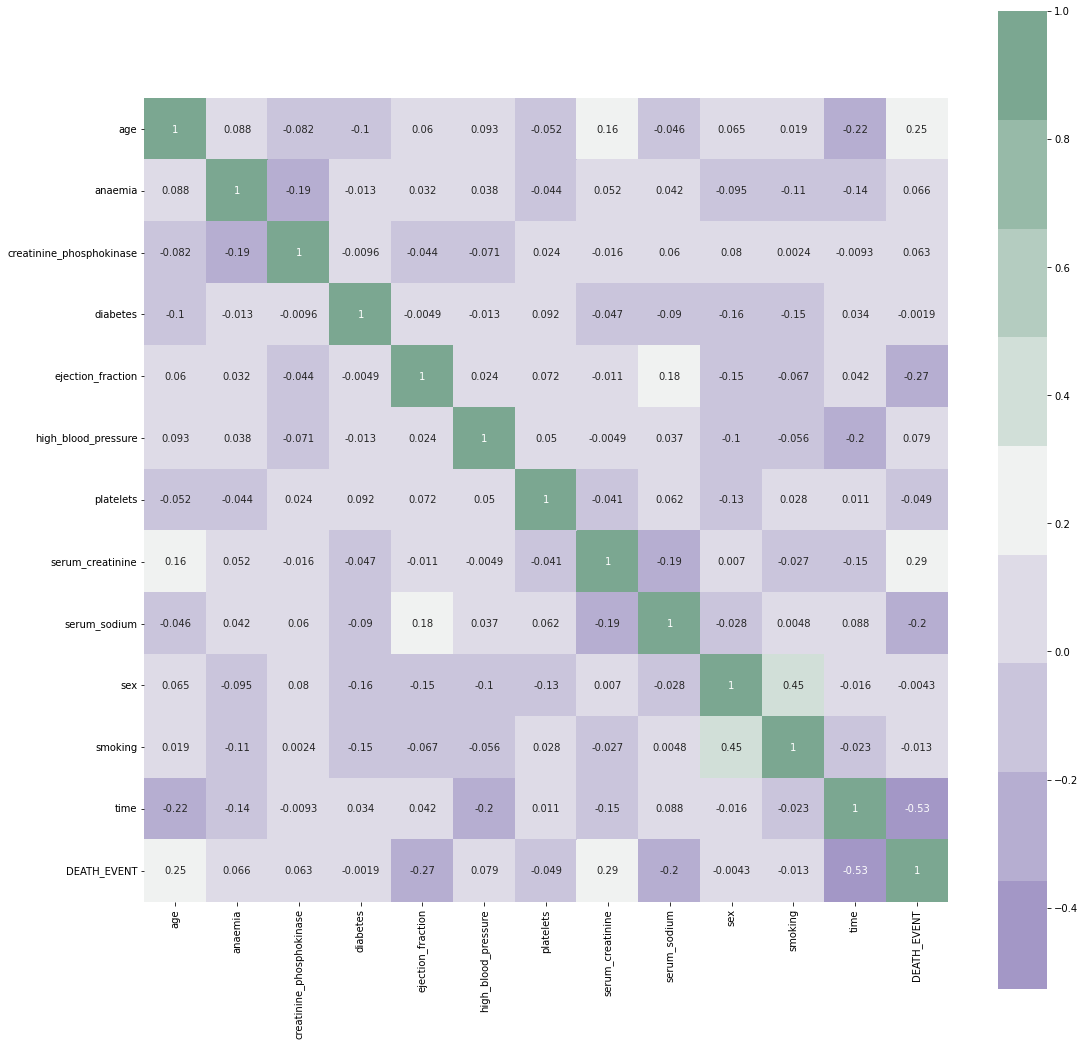

In [11]:
cmap = sns.diverging_palette(275, 150, s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True);

Text(0.5, 1.0, 'distribution of age')

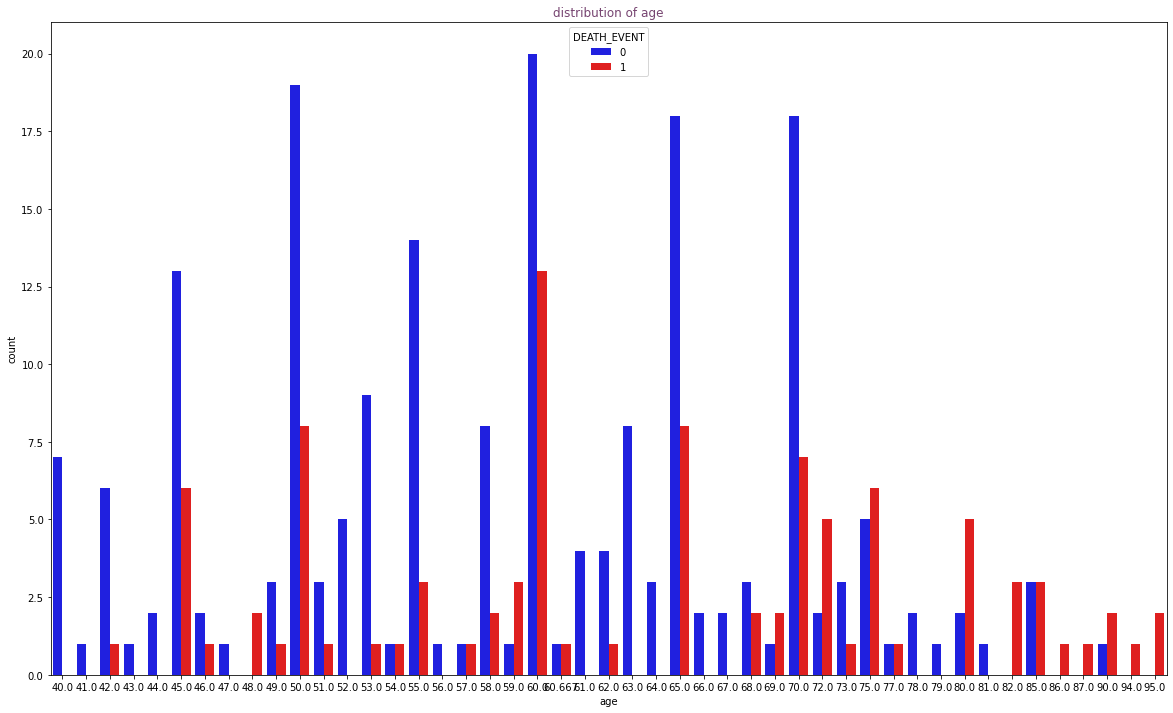

In [12]:
plt.figure(figsize=(20,12))
days_of_week = sns.countplot(x=data['age'], data=data, hue='DEATH_EVENT', palette=cols)
days_of_week.set_title('distribution of age', color="#774571")

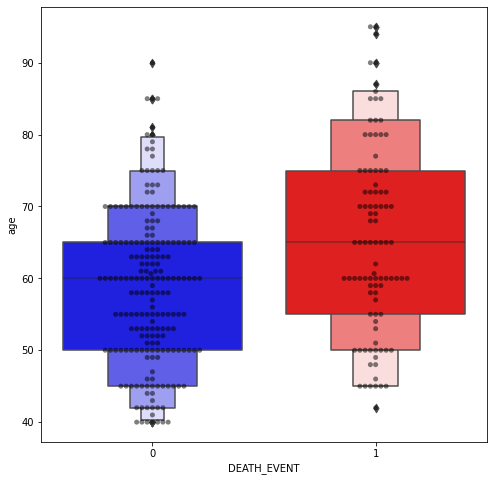

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


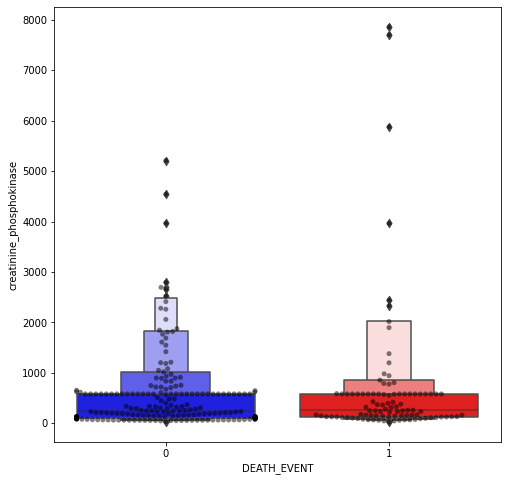

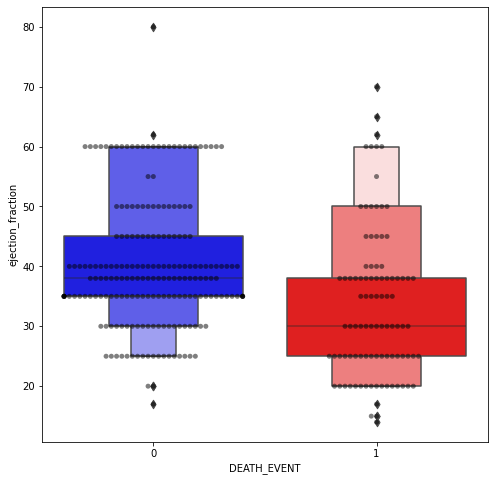

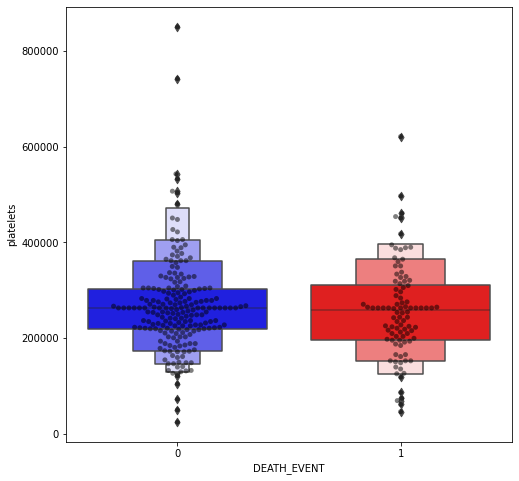

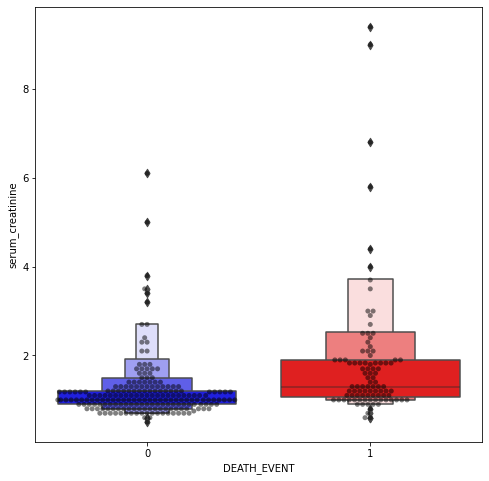

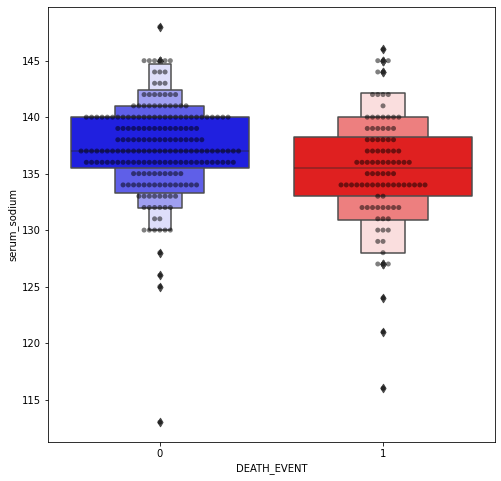

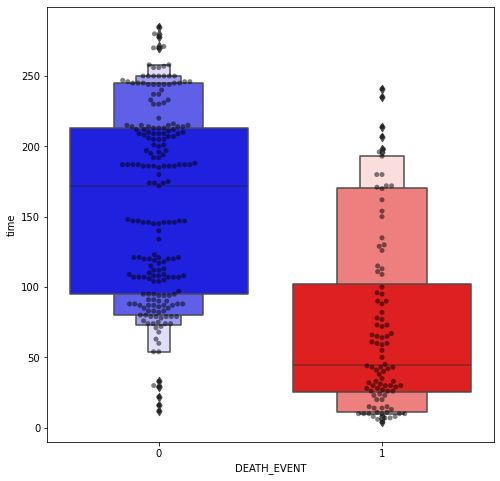

In [13]:
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["DEATH_EVENT"], y=data[i], palette=cols)
    plt.show()

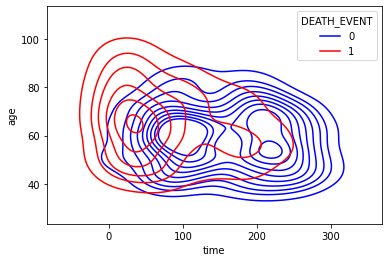

In [14]:
sns.kdeplot(x=data['time'], y=data['age'], hue=data['DEATH_EVENT'], palette=cols)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [16]:
X = data.drop(['DEATH_EVENT'], axis=1)
y = data['DEATH_EVENT']

In [17]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
x_df = s_scaler.fit_transform(X)

In [18]:
x_df = pd.DataFrame(x_df, columns=col_names)

In [19]:
x_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [20]:
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


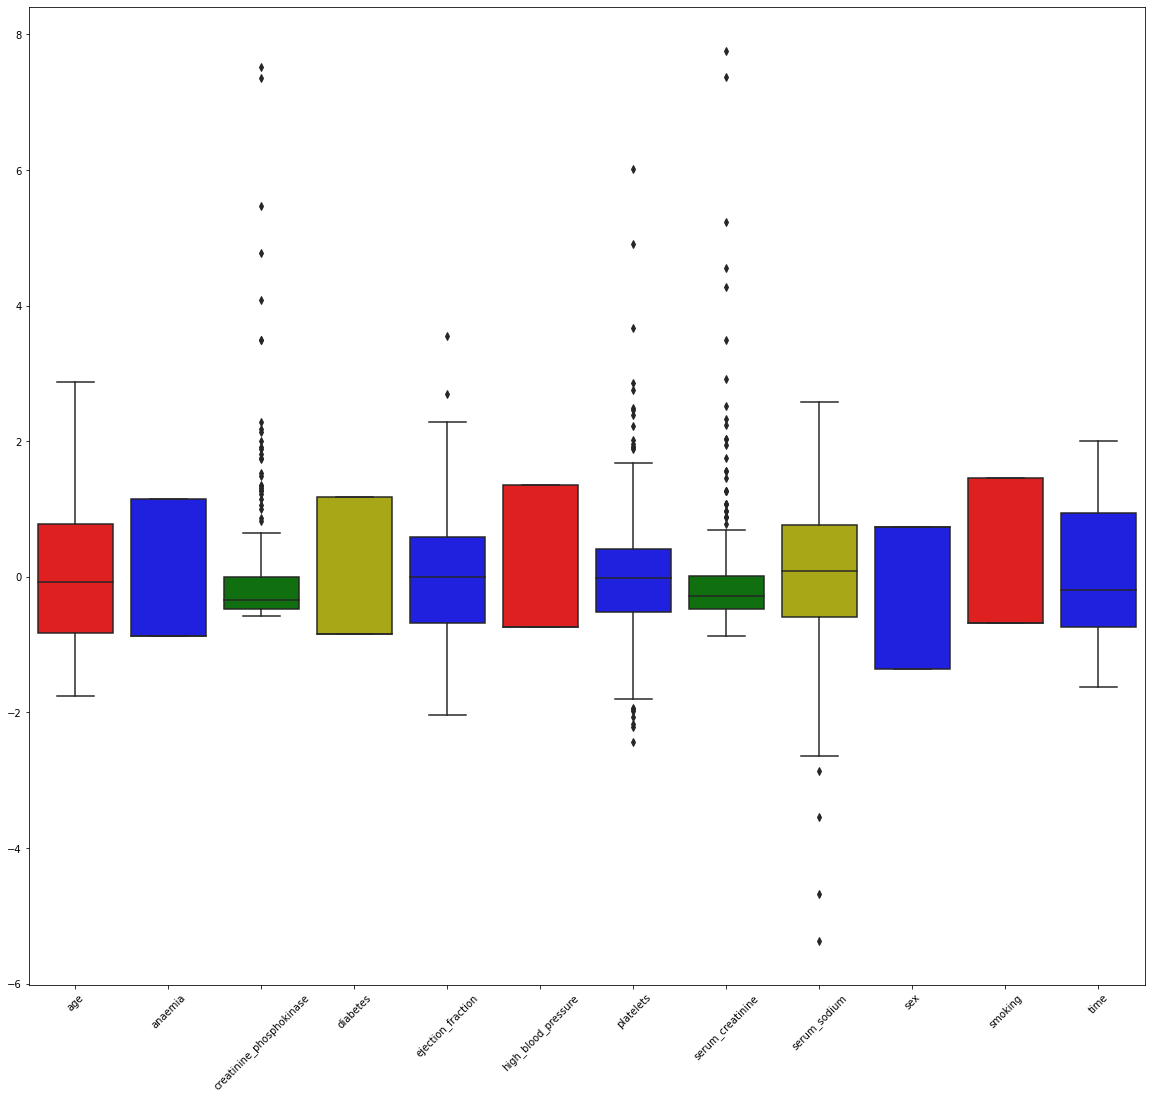

In [21]:
colours = ['r', 'b', 'g', 'y', 'b']
plt.figure(figsize=(20,18))
sns.boxplot(data=x_df, palette=colours)
plt.xticks(rotation=45)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.25, random_state=7 )

In [23]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True)

In [24]:
model1 = Sequential()
model1.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model1.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=12))
model1.add(Dropout(0.25))
model1.add(Dense(units=4, kernel_initializer='uniform', activation='relu', input_dim=12))
model1.add(Dropout(0.5))
model1.add(Dense(units=1, kernel_initializer='uniform', activation='relu', input_dim=12))
model1.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid', input_dim=12))


In [25]:
from tensorflow.keras.optimizers import SGD

In [26]:
model1.compile(optimizers='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=20,
    restore_best_weights=True)


model = Sequential()


model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 300,callbacks=[early_stopping], validation_split=0.2)

Train on 179 samples, validate on 45 samples
Epoch 1/300
179/179 [==============================] - 0s 1ms/sample - loss: 0.6927 - accuracy: 0.6425 - val_loss: 0.6921 - val_accuracy: 0.6667
Epoch 2/300
179/179 [==============================] - 0s 104us/sample - loss: 0.6920 - accuracy: 0.6480 - val_loss: 0.6911 - val_accuracy: 0.6667
Epoch 3/300
179/179 [==============================] - 0s 109us/sample - loss: 0.6910 - accuracy: 0.6480 - val_loss: 0.6902 - val_accuracy: 0.6667
Epoch 4/300
179/179 [==============================] - 0s 116us/sample - loss: 0.6901 - accuracy: 0.6480 - val_loss: 0.6892 - val_accuracy: 0.6667
Epoch 5/300
179/179 [==============================] - 0s 110us/sample - loss: 0.6893 - accuracy: 0.6480 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 6/300
179/179 [==============================] - 0s 126us/sample - loss: 0.6885 - accuracy: 0.6480 - val_loss: 0.6871 - val_accuracy: 0.6667
Epoch 7/300
179/179 [==============================] - 0s 110us/sample - lo

In [28]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" %('val_accuracy', val_accuracy*100))


val_accuracy: 76.10%


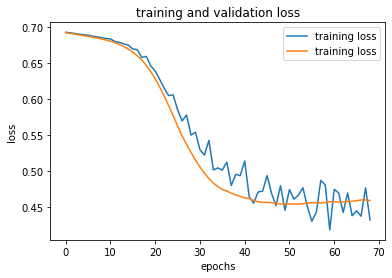

In [29]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], label='training loss')
plt.plot(history_df.loc[:, ['val_loss']], label='training loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

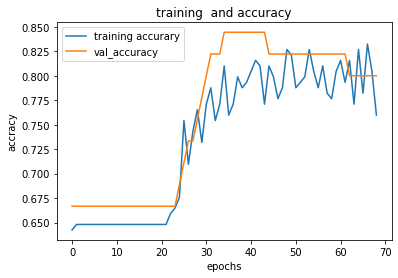

In [30]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['accuracy']], label='training accurary')
plt.plot(history_df.loc[:,['val_accuracy']], label='val_accuracy')
plt.title('training  and accuracy')
plt.xlabel('epochs')
plt.ylabel('accracy')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
np.set_printoptions()

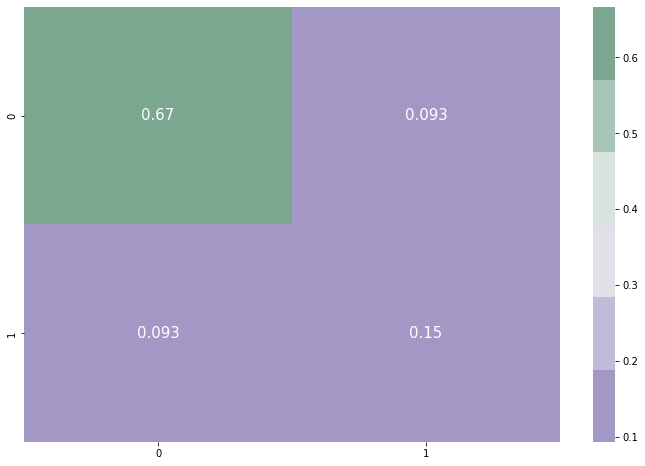

In [32]:
cmap1 = sns.diverging_palette(275, 150, s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap1, annot=True, annot_kws={'size':15})

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        57
           1       0.61      0.61      0.61        18

    accuracy                           0.81        75
   macro avg       0.74      0.74      0.74        75
weighted avg       0.81      0.81      0.81        75

